# Capstone Project - Predicting House Prices in KING COUNTY

# 1. Import Libraries and load dataset

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
sns.set(color_codes=True)
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [2]:
# Load the HOUSE Dataset
house_df = pd.read_csv("innercity.csv")

In [3]:
house_df.shape # Rows and Columns are matching

(21613, 23)

# 2. Data Cleaning and Exploration

In [4]:
#house_df.dtypes

##### Extract Year and Month from the column dayhours, add to the database and then drop the attribute dayhours 


In [5]:
house_df['dayhours']    = house_df['dayhours'].astype(str)
house_df['sold_year']   = house_df['dayhours'].str[:4].astype(np.int64)
house_df['sold_month']  = house_df['dayhours'].str[4:6].astype(np.int64)
house_df.drop('dayhours', axis = 1 , inplace= True)

#### Calculate the age of the property and age after renovation before sold year

In [6]:
house_df['house_age']   = (house_df['sold_year'] - house_df['yr_built']).astype(np.int64) 

In [7]:
house_df['age_after_renovtion']   = ''
rec_count = house_df.shape[0]
for i in range(rec_count):
    if  (house_df['yr_renovated'][i] != 0):
        house_df['age_after_renovtion'][i] = house_df['sold_year'][i] - house_df['yr_renovated'][i]
    else:
        house_df['age_after_renovtion'][i]=0

In [8]:
house_df['age_after_renovtion']   = house_df['age_after_renovtion'].astype(np.int64)

In [9]:
# change the sequence of the columns
house_df = house_df[['cid', 'yr_built', 'sold_year', 'sold_month', 'yr_renovated', 'house_age', 'age_after_renovtion', 
                     'room_bed', 'room_bath', 'living_measure', 'lot_measure', 'ceil', 
                     'coast', 'sight', 'condition', 'quality', 'ceil_measure', 'basement',  'zipcode', 'lat', 'long', 
                     'living_measure15', 'lot_measure15', 'furnished', 'total_area', 'price']]

In [10]:
#house_df.dtypes

In [11]:
house_df.shape # New columns are added

(21613, 26)

In [12]:
#house_df.head(50) # Top 5 rows

In [13]:
#house_df.tail(5) # Bottom 5 rows]

#### Plot missing values (if any)

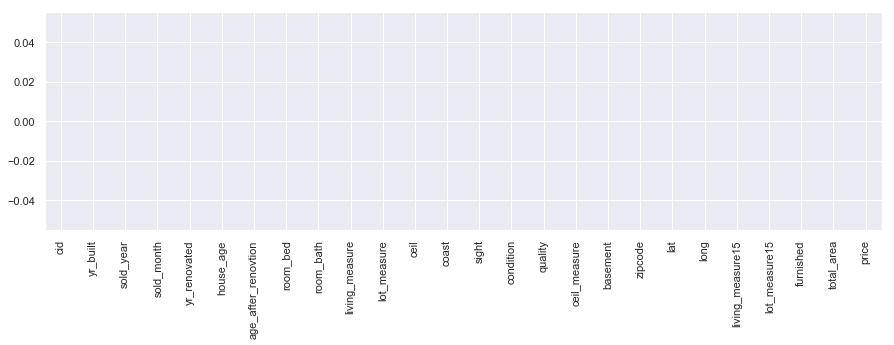

In [14]:
col_null = house_df.isnull().sum()
col_null_frac = col_null / house_df.shape[0]

plt.figure(figsize= (15,4))
col_null_frac.plot(kind='bar')

#### Check for duplicates based on the feature "cid" 

In [15]:
print(any(house_df['cid'].duplicated()))  

True


In [16]:
#house_df[house_df.duplicated(['cid'], keep=False)].sort_values('cid')
#pd.concat(g for _, g in house_df.groupby("cid") if len(g) > 1)

In [17]:
house_df = house_df.drop_duplicates(['cid'])

In [18]:
house_df.shape # Duplicate rows removed

(21436, 26)

In [19]:
house_df_BK = house_df
#house_df = house_df_BK

In [20]:
#house_df.head(2)

#### Check for  zero values (if any)

In [21]:
np.all(house_df==0)

False

In [22]:
#print((house_df.iloc[:] == 0).sum())

In [23]:
# Create a separate dataframe consisting only of the features i.e independent attributes

house_feature_df = house_df.drop(['cid', 'sold_year','sold_month'], axis=1) 

In [24]:
# Write outfiles to directory

house_df.to_csv('house_df.csv')
house_feature_df.to_csv('house_feature_df.csv')

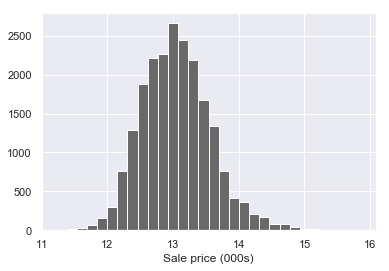

In [27]:
target = np.log(house_feature_df['price'])
fig = plt.figure()
ax = plt.axes()
n,bins,patches=plt.hist(target, 30, facecolor='dimgrey')
plt.xlabel("Sale price (000s)")
plt.show()

### Exploring categorical features representing in numeric (Label encoders)

In [28]:
def doPlots(x, data, ii, fun):   
    fig, axes = plt.subplots(len(ii) // 2, ncols = 2)
    fig.tight_layout()
    for i in range(len(ii)):
        fun(x=x[ii[i]], data=data, ax=axes[i // 2, i % 2], color='dimgrey')
    plt.show()

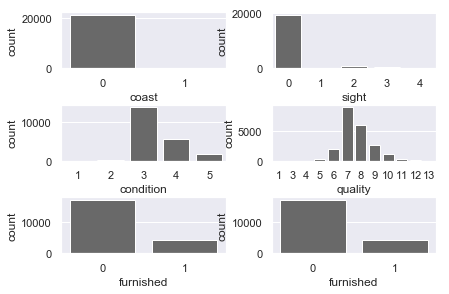

In [29]:
import seaborn as sb
Label_encoders = ['coast','sight','condition','quality','furnished','furnished']
doPlots(Label_encoders, house_feature_df, range(0,6), sb.countplot)

# 3. Descriptive statistics of numeric columns 

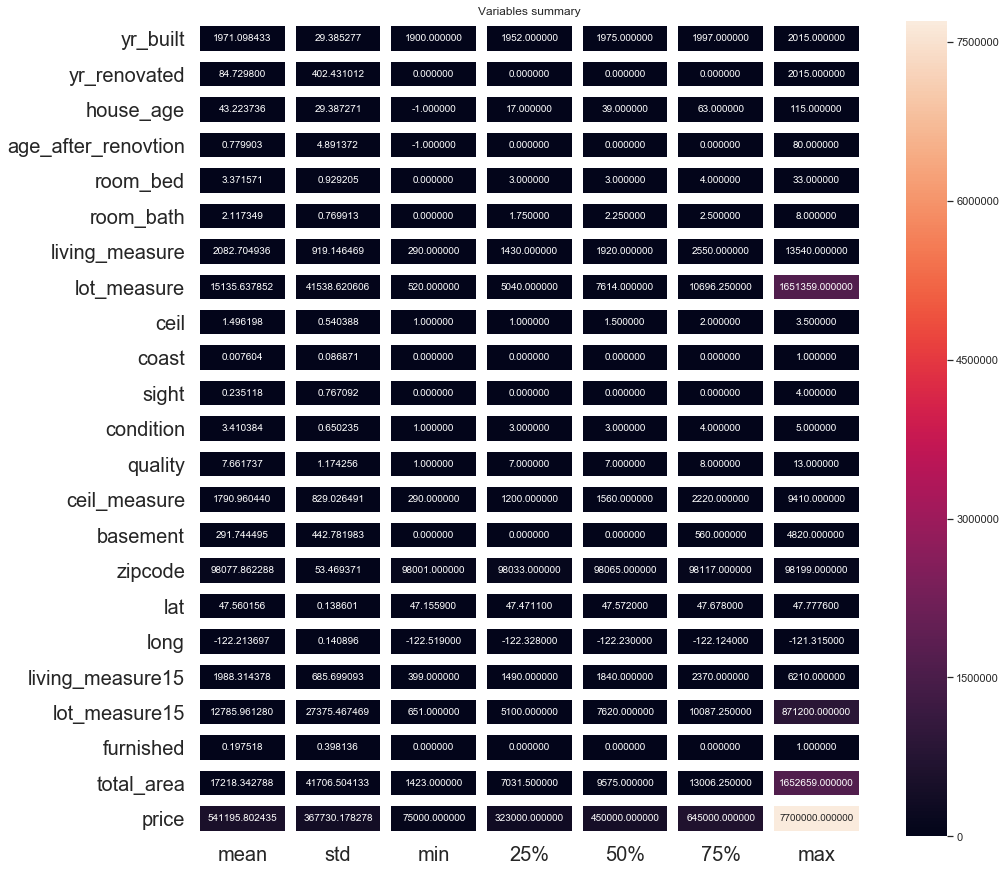

In [30]:
plt.figure(figsize=(15,15))
sns.heatmap(house_feature_df.describe()[1:].transpose(),linewidth=10,annot=True,fmt="f")
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.title("Variables summary")
plt.show()

In [31]:
house_feature_df.describe().transpose() # Shows the Stats of only Numerical independent variables

count           mean            std         min  \
yr_built             21436.0    1971.098433      29.385277   1900.0000   
yr_renovated         21436.0      84.729800     402.431012      0.0000   
house_age            21436.0      43.223736      29.387271     -1.0000   
age_after_renovtion  21436.0       0.779903       4.891372     -1.0000   
room_bed             21436.0       3.371571       0.929205      0.0000   
room_bath            21436.0       2.117349       0.769913      0.0000   
living_measure       21436.0    2082.704936     919.146469    290.0000   
lot_measure          21436.0   15135.637852   41538.620606    520.0000   
ceil                 21436.0       1.496198       0.540388      1.0000   
coast                21436.0       0.007604       0.086871      0.0000   
sight                21436.0       0.235118       0.767092      0.0000   
condition            21436.0       3.410384       0.650235      1.0000   
quality              21436.0       7.661737       1.174256      1.0000   
ceil_measure         21436.0    1790.960440     829.026491    290.0000   
basement             21436.0     291.744495     442.781983      0.0000   
zipcode              21436.0   98077.862288      53.469371  98001.0000   
lat                  21436.0      47.560156       0.138601     47.1559   
long                 21436.0    -122.213697       0.140896   -122.5190   
living_measure15     21436.0    1988.314378     685.699093    399.0000   
lot_measure15        21436.0   12785.961280   27375.467469    651.0000   
furnished            21436.0       0.197518       0.398136      0.0000   
total_area           21436.0   17218.342788   41706.504133   1423.0000   
price                21436.0  541195.802435  367730.178278  75000.0000   

                             25%         50%         75%           max  
yr_built               1952.0000    1975.000    1997.000  2.015000e+03  
yr_renovated              0.0000       0.000       0.000  2.015000e+03  
house_age                17.0000      39.000      63.000  1.150000e+02  
age_after_renovtion       0.0000       0.000       0.000  8.000000e+01  
room_bed                  3.0000       3.000       4.000  3.300000e+01  
room_bath                 1.7500       2.250       2.500  8.000000e+00  
living_measure         1430.0000    1920.000    2550.000  1.354000e+04  
lot_measure            5040.0000    7614.000   10696.250  1.651359e+06  
ceil                      1.0000       1.500       2.000  3.500000e+00  
coast                     0.0000       0.000       0.000  1.000000e+00  
sight                     0.0000       0.000       0.000  4.000000e+00  
condition                 3.0000       3.000       4.000  5.000000e+00  
quality                   7.0000       7.000       8.000  1.300000e+01  
ceil_measure           1200.0000    1560.000    2220.000  9.410000e+03  
basement                  0.0000       0.000     560.000  4.820000e+03  
zipcode               98033.0000   98065.000   98117.000  9.819900e+04  
lat                      47.4711      47.572      47.678  4.777760e+01  
long                   -122.3280    -122.230    -122.124 -1.213150e+02  
living_measure15       1490.0000    1840.000    2370.000  6.210000e+03  
lot_measure15          5100.0000    7620.000   10087.250  8.712000e+05  
furnished                 0.0000       0.000       0.000  1.000000e+00  
total_area             7031.5000    9575.000   13006.250  1.652659e+06  
price                323000.0000  450000.000  645000.000  7.700000e+06

### Drop the target variable

In [32]:
#house_feature_df = house_feature_df.drop(['price'], axis=1)

#### Visualizing the distribution of a dataset. Plot the variables and check for the distributions.

In [33]:
import matplotlib.pyplot as plt
%matplotlib inline

#house_df_.hist(figsize=(10,10))

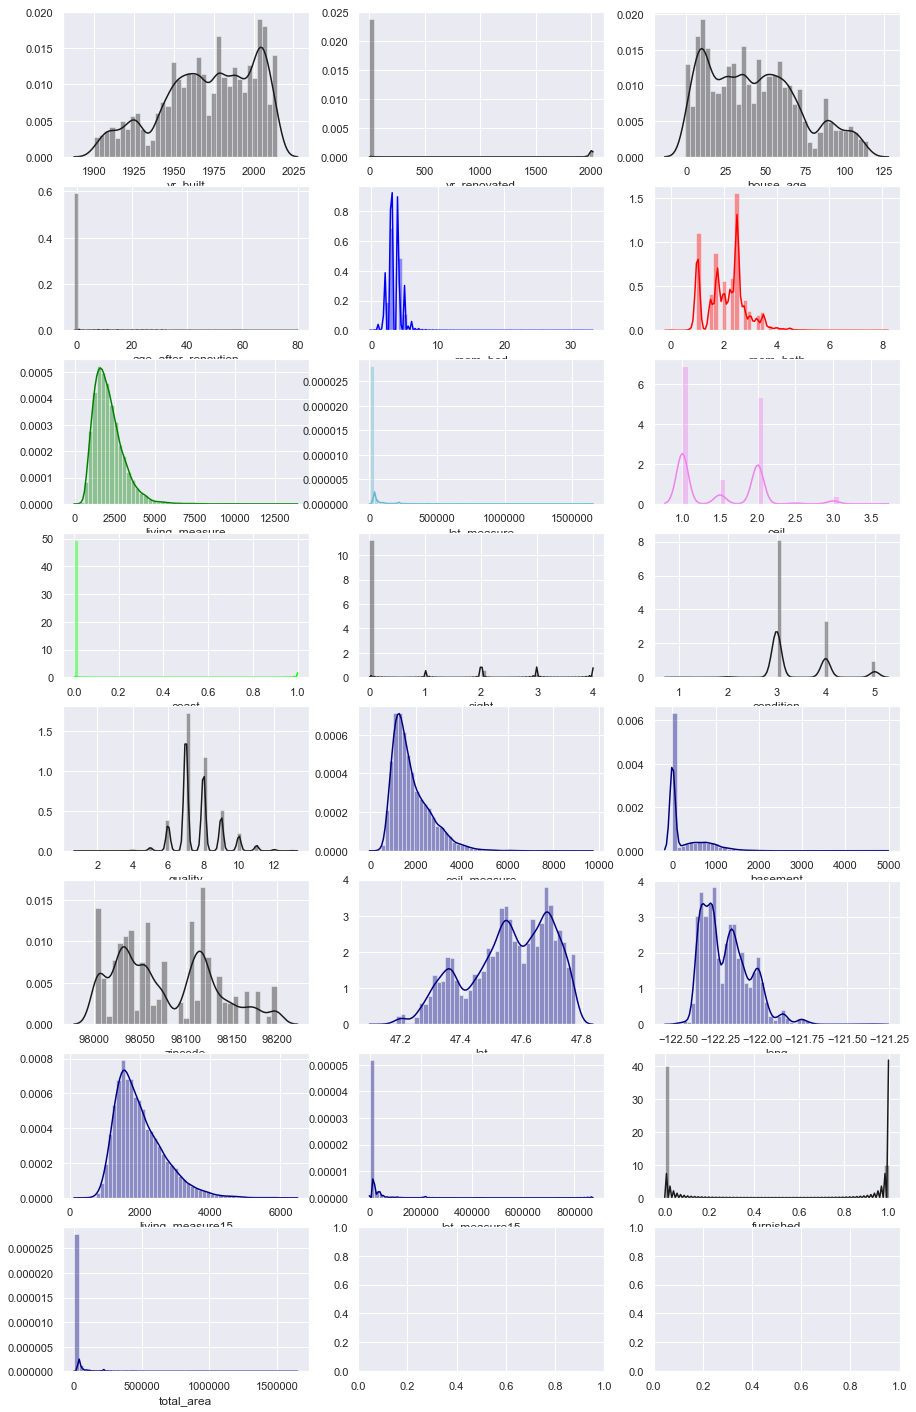

In [34]:
# Plot the distribution  

f, axes = plt.subplots(8, 3, figsize=(15, 25))

sns.distplot(house_feature_df['yr_built'], color="k", ax=axes[0,0])
sns.distplot(house_feature_df['yr_renovated'], color="k", ax=axes[0,1])
sns.distplot(house_feature_df['house_age'], color="k", ax=axes[0,2])
sns.distplot(house_feature_df['age_after_renovtion'], color="k", ax=axes[1,0])
sns.distplot(house_feature_df['room_bed'], color="Blue",ax=axes[1,1])
sns.distplot(house_feature_df['room_bath'], color="red", ax=axes[1,2])
sns.distplot(house_feature_df['living_measure'], color="green", ax=axes[2,0])
sns.distplot(house_feature_df['lot_measure'], color="c", ax=axes[2,1])
sns.distplot(house_feature_df['ceil'], color="violet", ax=axes[2,2])
sns.distplot(house_feature_df['coast'], color="lime", ax=axes[3,0])
sns.distplot(house_feature_df['sight'], color="k", ax=axes[3,1])
sns.distplot(house_feature_df['condition'], color="k", ax=axes[3,2])
sns.distplot(house_feature_df['quality'], color="k", ax=axes[4,0])
sns.distplot(house_feature_df['ceil_measure'], color="navy", ax=axes[4,1])
sns.distplot(house_feature_df['basement'], color="navy", ax=axes[4,2])
sns.distplot(house_feature_df['zipcode'], color="k", ax=axes[5,0])
sns.distplot(house_feature_df['lat'], color="navy", ax=axes[5,1])
sns.distplot(house_feature_df['long'], color="navy", ax=axes[5,2])
sns.distplot(house_feature_df['living_measure15'], color="navy", ax=axes[6,0])
sns.distplot(house_feature_df['lot_measure15'], color="navy", ax=axes[6,1])
sns.distplot(house_feature_df['furnished'], color="k", ax=axes[6,2])
sns.distplot(house_feature_df['total_area'], color="navy", ax=axes[7,0])

plt.show()

#### The target attribute price distribution

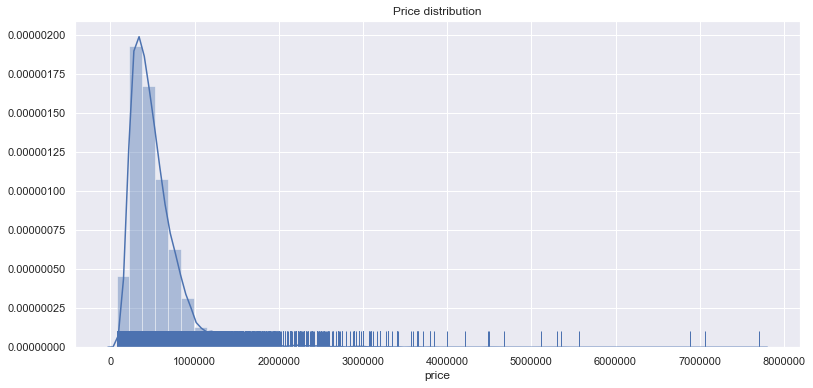

In [35]:
plt.figure(figsize=(13,6))
sns.distplot(house_feature_df["price"],color="b",rug=True)
plt.title("Price distribution")
plt.show()



In [36]:
# Function to determine if the given attribute is positively skewed or negatively skewed

def skew(attribute):
    
    mean     = round(house_feature_df[attribute].mean())
    median   = round(house_feature_df[attribute].median())
    q75, q25 = np.percentile(house_feature_df[attribute], [75 ,25])
    
    if  (mean > median):
        print("Positive Right skewed distribution. Median Closure to Q3. Mean > Median")
    
    if  (mean < median):
        print("Negative Left skewed distribution. Median Closure to Q1. Mean > Median")

    if  (mean == median):
        print("Unskewed distribution. Mean = Median")
        
    print("Mean   :" ,mean)
    print("Median :" ,median) 
    print("25%    :",q25)
    print("75%    :",q75)
    sns.distplot(house_feature_df[attribute],color="Blue",label='Skew = ' + str(round(house_feature_df[attribute].skew(),3)))
    plt.legend()
    plt.show()
    return 


#### Plotting univariate distributions

Negative Left skewed distribution. Median Closure to Q1. Mean > Median
('Mean   :', 1971.0)
('Median :', 1975.0)
('25%    :', 1952.0)
('75%    :', 1997.0)


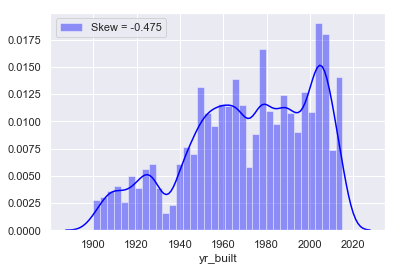

In [37]:
skew("yr_built")

Positive Right skewed distribution. Median Closure to Q3. Mean > Median
('Mean   :', 85.0)
('Median :', 0.0)
('25%    :', 0.0)
('75%    :', 0.0)


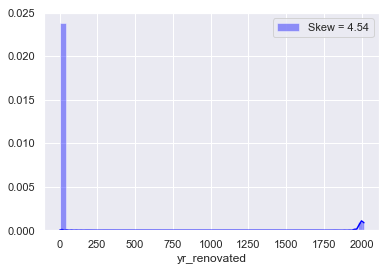

In [38]:
skew("yr_renovated")

Positive Right skewed distribution. Median Closure to Q3. Mean > Median
('Mean   :', 43.0)
('Median :', 39.0)
('25%    :', 17.0)
('75%    :', 63.0)


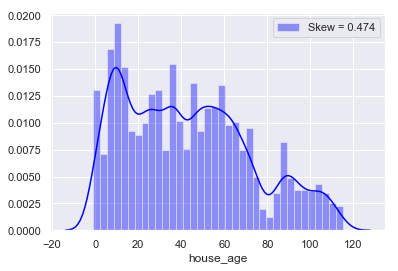

In [39]:
skew("house_age")

Positive Right skewed distribution. Median Closure to Q3. Mean > Median
('Mean   :', 1.0)
('Median :', 0.0)
('25%    :', 0.0)
('75%    :', 0.0)


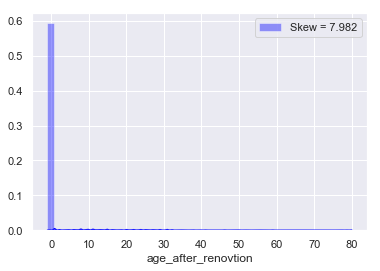

In [40]:
skew("age_after_renovtion")

Unskewed distribution. Mean = Median
('Mean   :', 3.0)
('Median :', 3.0)
('25%    :', 3.0)
('75%    :', 4.0)


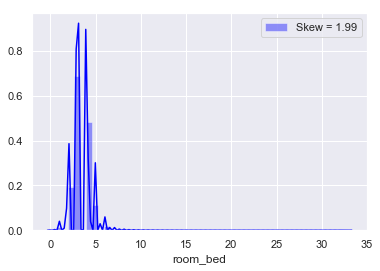

In [41]:
skew("room_bed")

Unskewed distribution. Mean = Median
('Mean   :', 2.0)
('Median :', 2.0)
('25%    :', 1.75)
('75%    :', 2.5)


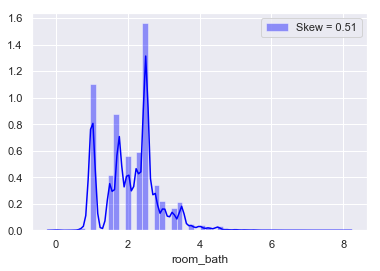

In [42]:
skew("room_bath")

Positive Right skewed distribution. Median Closure to Q3. Mean > Median
('Mean   :', 2083.0)
('Median :', 1920.0)
('25%    :', 1430.0)
('75%    :', 2550.0)


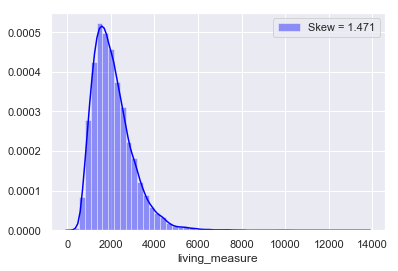

In [43]:
skew("living_measure")

Positive Right skewed distribution. Median Closure to Q3. Mean > Median
('Mean   :', 15136.0)
('Median :', 7614.0)
('25%    :', 5040.0)
('75%    :', 10696.25)


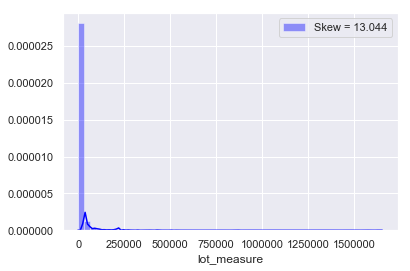

In [44]:
skew("lot_measure")

Negative Left skewed distribution. Median Closure to Q1. Mean > Median
('Mean   :', 1.0)
('Median :', 2.0)
('25%    :', 1.0)
('75%    :', 2.0)


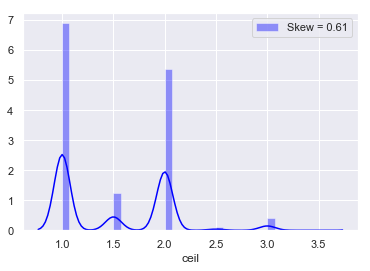

In [45]:
skew("ceil")

Unskewed distribution. Mean = Median
('Mean   :', 0.0)
('Median :', 0.0)
('25%    :', 0.0)
('75%    :', 0.0)


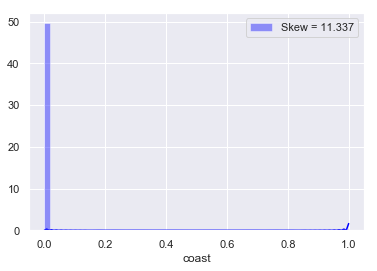

In [46]:
skew("coast")

Unskewed distribution. Mean = Median
('Mean   :', 0.0)
('Median :', 0.0)
('25%    :', 0.0)
('75%    :', 0.0)


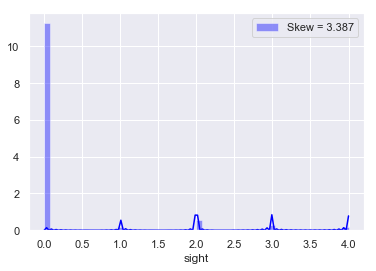

In [47]:
skew("sight")

Unskewed distribution. Mean = Median
('Mean   :', 3.0)
('Median :', 3.0)
('25%    :', 3.0)
('75%    :', 4.0)


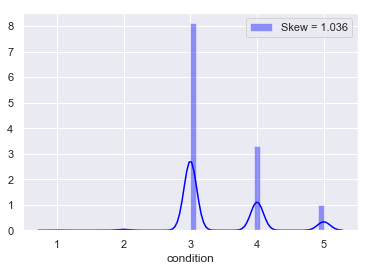

In [48]:
skew("condition")

Positive Right skewed distribution. Median Closure to Q3. Mean > Median
('Mean   :', 8.0)
('Median :', 7.0)
('25%    :', 7.0)
('75%    :', 8.0)


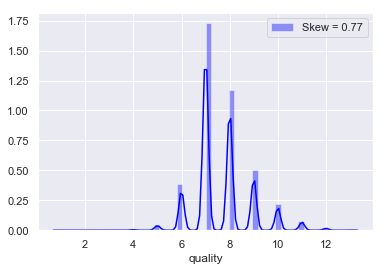

In [49]:
skew("quality")

Positive Right skewed distribution. Median Closure to Q3. Mean > Median
('Mean   :', 1791.0)
('Median :', 1560.0)
('25%    :', 1200.0)
('75%    :', 2220.0)


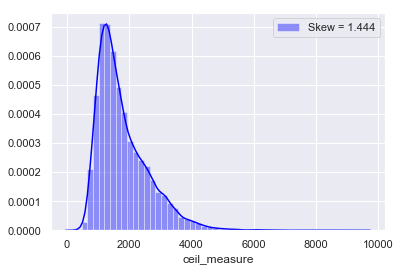

In [50]:
skew("ceil_measure")

Positive Right skewed distribution. Median Closure to Q3. Mean > Median
('Mean   :', 292.0)
('Median :', 0.0)
('25%    :', 0.0)
('75%    :', 560.0)


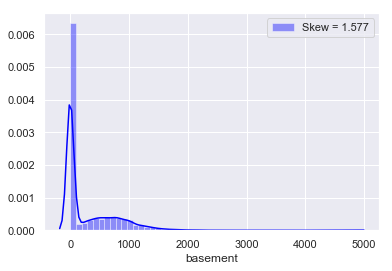

In [51]:
skew("basement")

Positive Right skewed distribution. Median Closure to Q3. Mean > Median
('Mean   :', 98078.0)
('Median :', 98065.0)
('25%    :', 98033.0)
('75%    :', 98117.0)


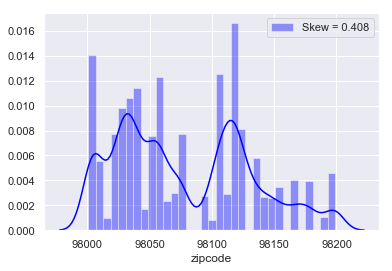

In [52]:
skew("zipcode")

Unskewed distribution. Mean = Median
('Mean   :', 48.0)
('Median :', 48.0)
('25%    :', 47.4711)
('75%    :', 47.678000000000004)


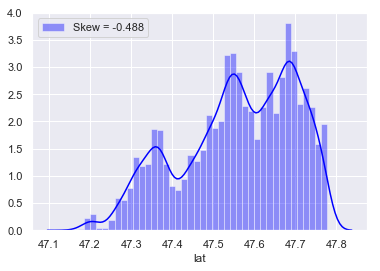

In [53]:
skew("lat")

Unskewed distribution. Mean = Median
('Mean   :', -122.0)
('Median :', -122.0)
('25%    :', -122.32799999999999)
('75%    :', -122.124)


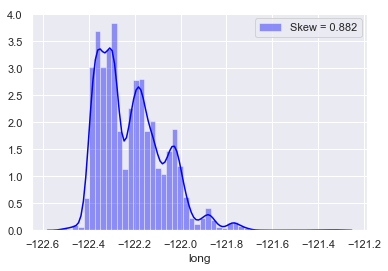

In [54]:
skew("long")

Positive Right skewed distribution. Median Closure to Q3. Mean > Median
('Mean   :', 1988.0)
('Median :', 1840.0)
('25%    :', 1490.0)
('75%    :', 2370.0)


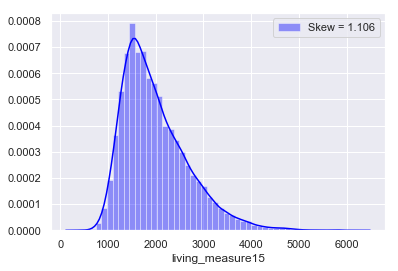

In [55]:
skew("living_measure15")

Positive Right skewed distribution. Median Closure to Q3. Mean > Median
('Mean   :', 12786.0)
('Median :', 7620.0)
('25%    :', 5100.0)
('75%    :', 10087.25)


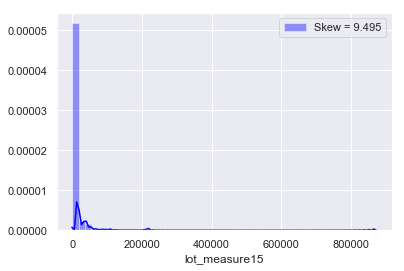

In [56]:
skew("lot_measure15")

Unskewed distribution. Mean = Median
('Mean   :', 0.0)
('Median :', 0.0)
('25%    :', 0.0)
('75%    :', 0.0)


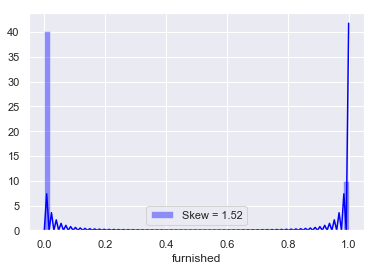

In [57]:
skew("furnished")

Positive Right skewed distribution. Median Closure to Q3. Mean > Median
('Mean   :', 17218.0)
('Median :', 9575.0)
('25%    :', 7031.5)
('75%    :', 13006.25)


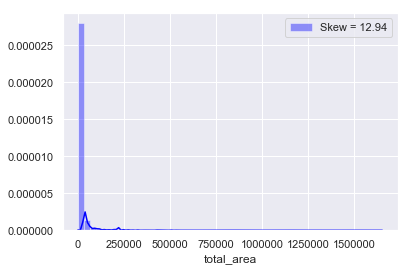

In [58]:
skew("total_area")

### Check for outliers

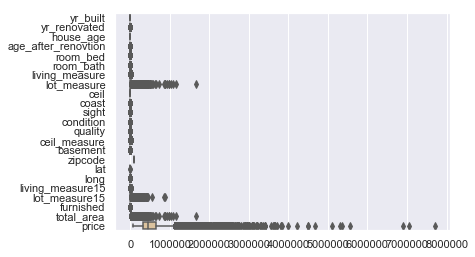

In [59]:
sns.boxplot(data=house_feature_df,orient='h',palette="Set2")
plt.show()

In [60]:
Q3, Q1   = np.percentile(house_feature_df, [75 ,25])
IQR      = Q3-Q1
Uwhisker = Q3 + (1.5*IQR) 
Lwhisker = Q1 - (1.5*IQR)  
Outliers = pd.DataFrame(house_feature_df < (Q1 - 1.5 * IQR)) |(house_feature_df > (Q3 + 1.5 * IQR))
Outliers.apply(pd.value_counts).fillna(0)

yr_built  yr_renovated  house_age  age_after_renovtion  room_bed  \
False   21436.0       21436.0    21436.0              21436.0   21436.0   
True        0.0           0.0        0.0                  0.0       0.0   

       room_bath  living_measure  lot_measure     ceil    coast  ...  \
False    21436.0           21335         6500  21436.0  21436.0  ...   
True         0.0             101        14936      0.0      0.0  ...   

       ceil_measure  basement  zipcode      lat     long  living_measure15  \
False         21398   21436.0      0.0  21436.0  21436.0             21428   
True             38       0.0  21436.0      0.0      0.0                 8   

       lot_measure15  furnished  total_area    price  
False           6496    21436.0        2957      0.0  
True           14940        0.0       18479  21436.0  

[2 rows x 23 columns]

In [61]:
#Outliers.apply(pd.value_counts)
#Outliers.describe()
#Outliers["ceil"].value_counts()
#Outliers.groupby('basement').size()
#x = pd.DataFrame(Outliers.apply(pd.value_counts).fillna(0))
#x.melt()

In [62]:
# Function to report six number summary for selected independent attribute before deciding on how to handle the Outliers

def Outlier(attribute):
    Q3, Q1 = np.percentile(house_feature_df[attribute], [75 ,25])
    iqr      = Q3-Q1
    Uwhisker = Q3 + (1.5*iqr) 
    Lwhisker = Q1 - (1.5*iqr)  
    xmedian  = np.median(house_feature_df[attribute])
    print("Median          :",xmedian)
    print("Q1              :",Q1)
    print("Q3              :",Q3)
    print("IQR             :",iqr)
    print("Max (U_whisker) :",Uwhisker)
    print("Min (L_whisker) :",Lwhisker)
    print("----------------------------------")
    print("Outliers count based on IQR Score:")
    print("----------------------------------")
    print(Outliers[attribute].value_counts())
    
    red_square = dict(markerfacecolor='r', marker='s')
    sns.boxplot(data=house_feature_df[attribute],orient='v',palette="Set2",linewidth=3.0,flierprops=red_square)
    plt.show()
    return 

('Median          :', 1975.0)
('Q1              :', 1952.0)
('Q3              :', 1997.0)
('IQR             :', 45.0)
('Max (U_whisker) :', 2064.5)
('Min (L_whisker) :', 1884.5)
----------------------------------
Outliers count based on IQR Score:
----------------------------------
False    21436
Name: yr_built, dtype: int64


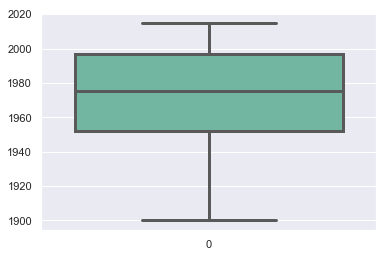

In [63]:
Outlier("yr_built")

('Median          :', 0.0)
('Q1              :', 0.0)
('Q3              :', 0.0)
('IQR             :', 0.0)
('Max (U_whisker) :', 0.0)
('Min (L_whisker) :', 0.0)
----------------------------------
Outliers count based on IQR Score:
----------------------------------
False    21436
Name: yr_renovated, dtype: int64


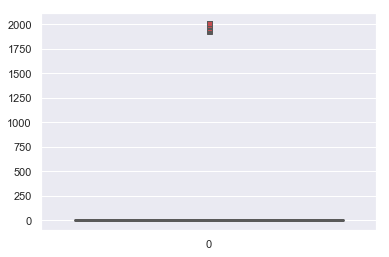

In [64]:
Outlier("yr_renovated")

('Median          :', 39.0)
('Q1              :', 17.0)
('Q3              :', 63.0)
('IQR             :', 46.0)
('Max (U_whisker) :', 132.0)
('Min (L_whisker) :', -52.0)
----------------------------------
Outliers count based on IQR Score:
----------------------------------
False    21436
Name: house_age, dtype: int64


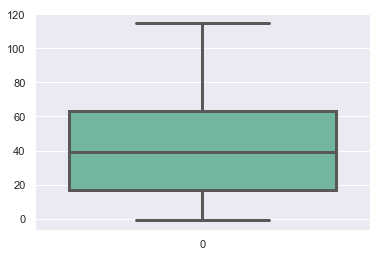

In [65]:
Outlier("house_age")

('Median          :', 0.0)
('Q1              :', 0.0)
('Q3              :', 0.0)
('IQR             :', 0.0)
('Max (U_whisker) :', 0.0)
('Min (L_whisker) :', 0.0)
----------------------------------
Outliers count based on IQR Score:
----------------------------------
False    21436
Name: age_after_renovtion, dtype: int64


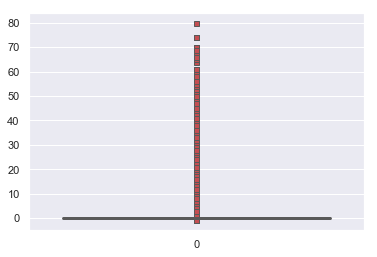

In [66]:
Outlier("age_after_renovtion")

('Median          :', 3.0)
('Q1              :', 3.0)
('Q3              :', 4.0)
('IQR             :', 1.0)
('Max (U_whisker) :', 5.5)
('Min (L_whisker) :', 1.5)
----------------------------------
Outliers count based on IQR Score:
----------------------------------
False    21436
Name: room_bed, dtype: int64


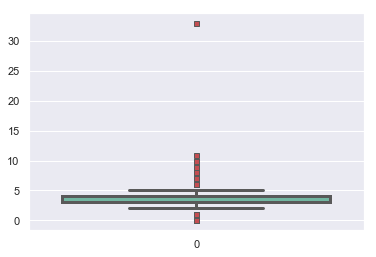

In [67]:
Outlier("room_bed")

('Median          :', 2.25)
('Q1              :', 1.75)
('Q3              :', 2.5)
('IQR             :', 0.75)
('Max (U_whisker) :', 3.625)
('Min (L_whisker) :', 0.625)
----------------------------------
Outliers count based on IQR Score:
----------------------------------
False    21436
Name: room_bath, dtype: int64


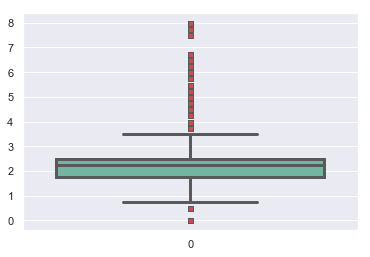

In [68]:
Outlier("room_bath")

('Median          :', 1920.0)
('Q1              :', 1430.0)
('Q3              :', 2550.0)
('IQR             :', 1120.0)
('Max (U_whisker) :', 4230.0)
('Min (L_whisker) :', -250.0)
----------------------------------
Outliers count based on IQR Score:
----------------------------------
False    21335
True       101
Name: living_measure, dtype: int64


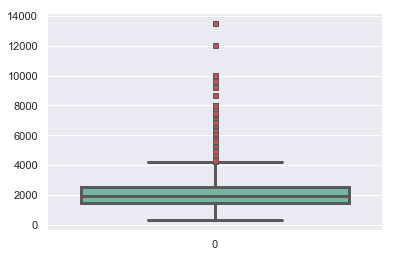

In [69]:
Outlier("living_measure")

('Median          :', 7614.0)
('Q1              :', 5040.0)
('Q3              :', 10696.25)
('IQR             :', 5656.25)
('Max (U_whisker) :', 19180.625)
('Min (L_whisker) :', -3444.375)
----------------------------------
Outliers count based on IQR Score:
----------------------------------
True     14936
False     6500
Name: lot_measure, dtype: int64


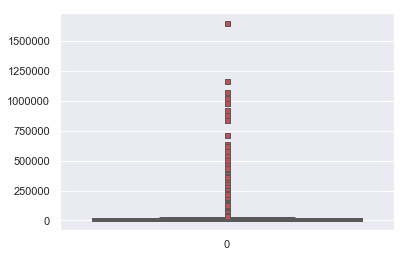

In [70]:
Outlier("lot_measure")

('Median          :', 1.5)
('Q1              :', 1.0)
('Q3              :', 2.0)
('IQR             :', 1.0)
('Max (U_whisker) :', 3.5)
('Min (L_whisker) :', -0.5)
----------------------------------
Outliers count based on IQR Score:
----------------------------------
False    21436
Name: ceil, dtype: int64


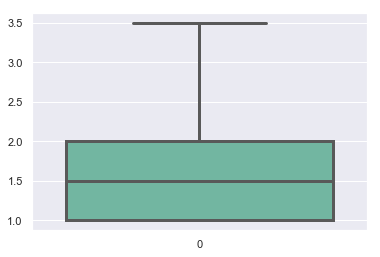

In [71]:
Outlier("ceil")

('Median          :', 0.0)
('Q1              :', 0.0)
('Q3              :', 0.0)
('IQR             :', 0.0)
('Max (U_whisker) :', 0.0)
('Min (L_whisker) :', 0.0)
----------------------------------
Outliers count based on IQR Score:
----------------------------------
False    21436
Name: coast, dtype: int64


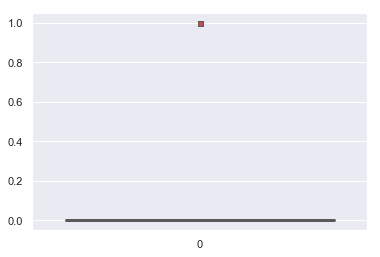

In [72]:
Outlier("coast")

('Median          :', 0.0)
('Q1              :', 0.0)
('Q3              :', 0.0)
('IQR             :', 0.0)
('Max (U_whisker) :', 0.0)
('Min (L_whisker) :', 0.0)
----------------------------------
Outliers count based on IQR Score:
----------------------------------
False    21436
Name: sight, dtype: int64


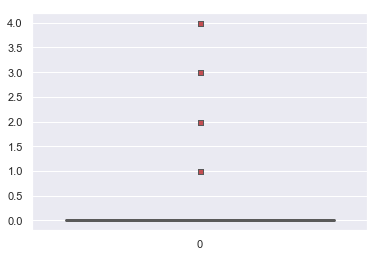

In [73]:
Outlier("sight")

('Median          :', 3.0)
('Q1              :', 3.0)
('Q3              :', 4.0)
('IQR             :', 1.0)
('Max (U_whisker) :', 5.5)
('Min (L_whisker) :', 1.5)
----------------------------------
Outliers count based on IQR Score:
----------------------------------
False    21436
Name: condition, dtype: int64


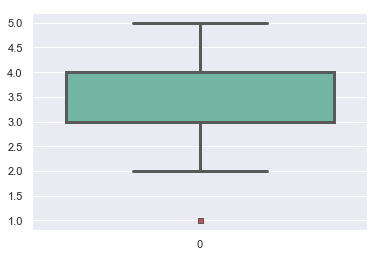

In [74]:
Outlier("condition")

('Median          :', 7.0)
('Q1              :', 7.0)
('Q3              :', 8.0)
('IQR             :', 1.0)
('Max (U_whisker) :', 9.5)
('Min (L_whisker) :', 5.5)
----------------------------------
Outliers count based on IQR Score:
----------------------------------
False    21436
Name: quality, dtype: int64


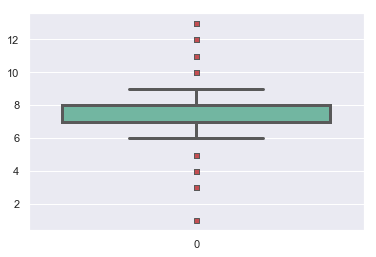

In [75]:
Outlier("quality")

('Median          :', 1560.0)
('Q1              :', 1200.0)
('Q3              :', 2220.0)
('IQR             :', 1020.0)
('Max (U_whisker) :', 3750.0)
('Min (L_whisker) :', -330.0)
----------------------------------
Outliers count based on IQR Score:
----------------------------------
False    21398
True        38
Name: ceil_measure, dtype: int64


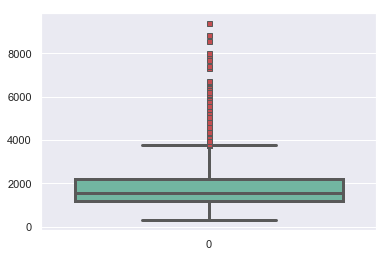

In [76]:
Outlier("ceil_measure")

('Median          :', 0.0)
('Q1              :', 0.0)
('Q3              :', 560.0)
('IQR             :', 560.0)
('Max (U_whisker) :', 1400.0)
('Min (L_whisker) :', -840.0)
----------------------------------
Outliers count based on IQR Score:
----------------------------------
False    21436
Name: basement, dtype: int64


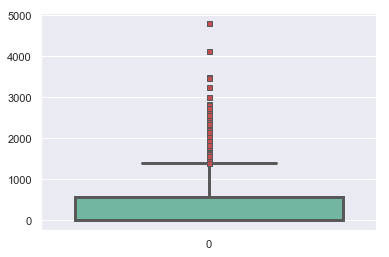

In [77]:
Outlier("basement")

('Median          :', 98065.0)
('Q1              :', 98033.0)
('Q3              :', 98117.0)
('IQR             :', 84.0)
('Max (U_whisker) :', 98243.0)
('Min (L_whisker) :', 97907.0)
----------------------------------
Outliers count based on IQR Score:
----------------------------------
True    21436
Name: zipcode, dtype: int64


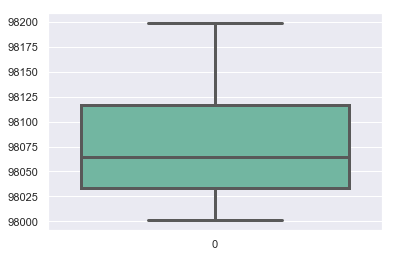

In [78]:
Outlier("zipcode")

('Median          :', 47.571999999999996)
('Q1              :', 47.4711)
('Q3              :', 47.678000000000004)
('IQR             :', 0.20690000000000452)
('Max (U_whisker) :', 47.98835000000001)
('Min (L_whisker) :', 47.16074999999999)
----------------------------------
Outliers count based on IQR Score:
----------------------------------
False    21436
Name: lat, dtype: int64


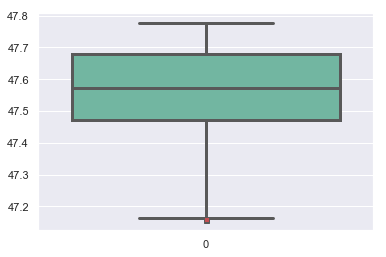

In [79]:
Outlier("lat")

('Median          :', -122.23)
('Q1              :', -122.32799999999999)
('Q3              :', -122.124)
('IQR             :', 0.20399999999999352)
('Max (U_whisker) :', -121.81800000000001)
('Min (L_whisker) :', -122.63399999999999)
----------------------------------
Outliers count based on IQR Score:
----------------------------------
False    21436
Name: long, dtype: int64


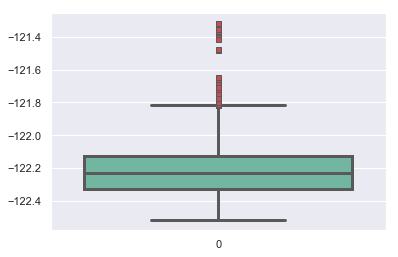

In [80]:
Outlier("long")

('Median          :', 1840.0)
('Q1              :', 1490.0)
('Q3              :', 2370.0)
('IQR             :', 880.0)
('Max (U_whisker) :', 3690.0)
('Min (L_whisker) :', 170.0)
----------------------------------
Outliers count based on IQR Score:
----------------------------------
False    21428
True         8
Name: living_measure15, dtype: int64


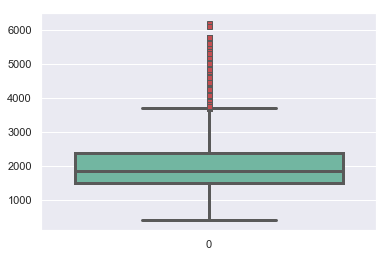

In [81]:
Outlier("living_measure15")

('Median          :', 7620.0)
('Q1              :', 5100.0)
('Q3              :', 10087.25)
('IQR             :', 4987.25)
('Max (U_whisker) :', 17568.125)
('Min (L_whisker) :', -2380.875)
----------------------------------
Outliers count based on IQR Score:
----------------------------------
True     14940
False     6496
Name: lot_measure15, dtype: int64


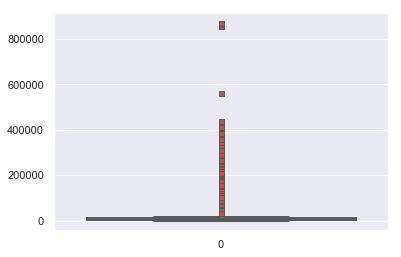

In [82]:
Outlier("lot_measure15")

('Median          :', 0.0)
('Q1              :', 0.0)
('Q3              :', 0.0)
('IQR             :', 0.0)
('Max (U_whisker) :', 0.0)
('Min (L_whisker) :', 0.0)
----------------------------------
Outliers count based on IQR Score:
----------------------------------
False    21436
Name: furnished, dtype: int64


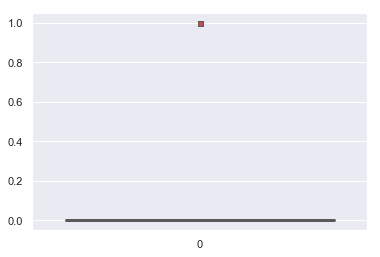

In [83]:
Outlier("furnished")

('Median          :', 9575.0)
('Q1              :', 7031.5)
('Q3              :', 13006.25)
('IQR             :', 5974.75)
('Max (U_whisker) :', 21968.375)
('Min (L_whisker) :', -1930.625)
----------------------------------
Outliers count based on IQR Score:
----------------------------------
True     18479
False     2957
Name: total_area, dtype: int64


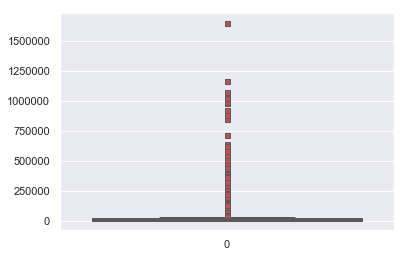

In [84]:
Outlier("total_area")

('Median          :', 450000.0)
('Q1              :', 323000.0)
('Q3              :', 645000.0)
('IQR             :', 322000.0)
('Max (U_whisker) :', 1128000.0)
('Min (L_whisker) :', -160000.0)
----------------------------------
Outliers count based on IQR Score:
----------------------------------
True    21436
Name: price, dtype: int64


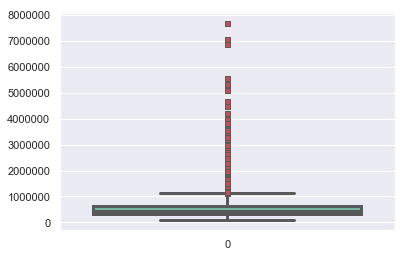

In [85]:
Outlier("price")

In [86]:
# DONOT DELETE  NO DELETE NO DELETE  NO DELETE ******************

##house_feature_df[~((house_feature_df < (Q1 - 1.5 * IQR)) |(house_feature_df > (Q3 + 1.5 * IQR))).any(axis=1)] *****

In [87]:
house_feature_df.shape

(21436, 23)

### Plotting bivariate distributions

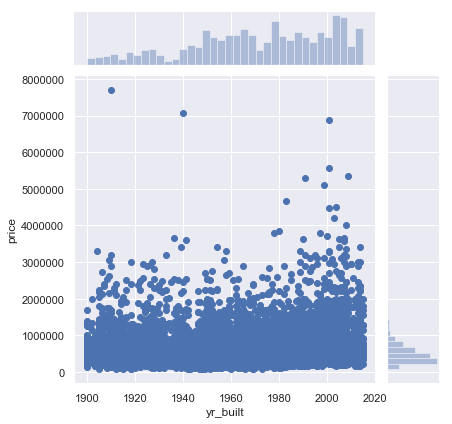

In [88]:
sns.jointplot(x=house_df['yr_built'], y=house_df['price']) 

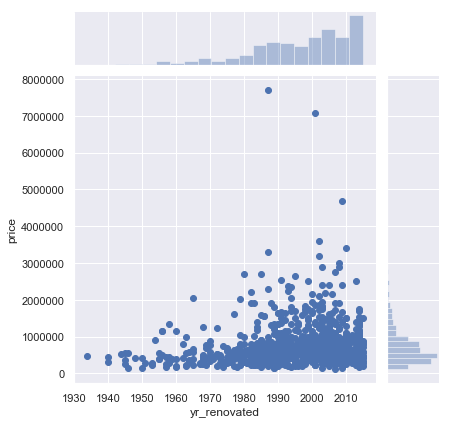

In [89]:
temp = house_df[house_df['yr_renovated'] != 0]
sns.jointplot(x=temp['yr_renovated'], y=temp['price']) 
del temp

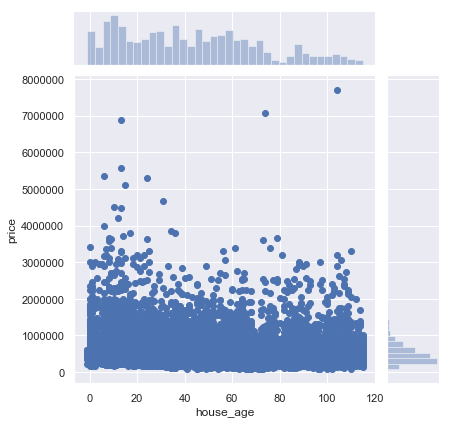

In [90]:
sns.jointplot(x=house_df['house_age'], y=house_df['price'])

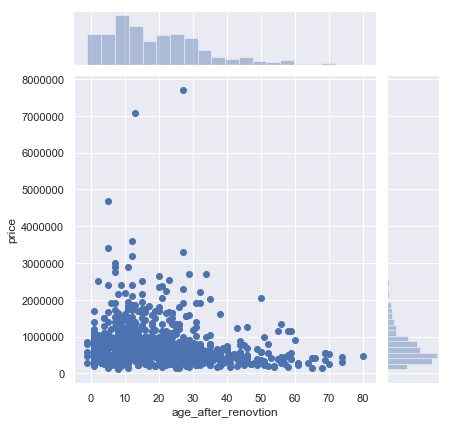

In [91]:
temp = house_df[house_df['age_after_renovtion'] != 0]
sns.jointplot(x=temp['age_after_renovtion'], y=temp['price']) 
del temp

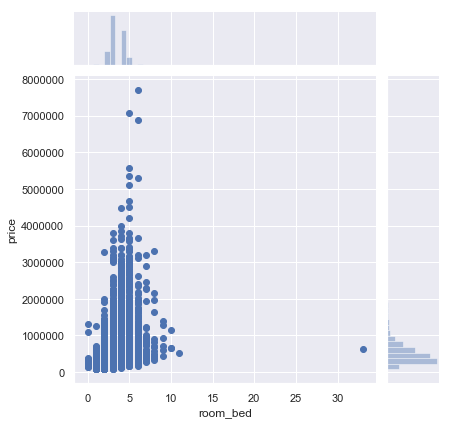

In [92]:
sns.jointplot(x=house_df['room_bed'], y=house_df['price'])

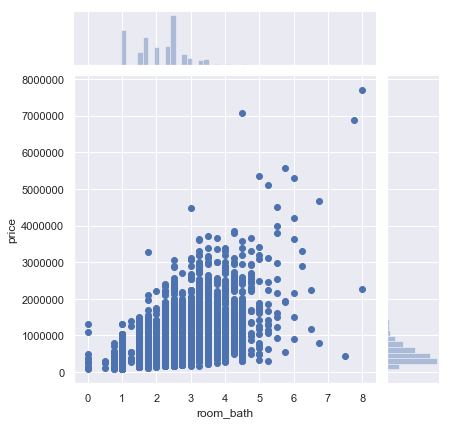

In [93]:
sns.jointplot(x=house_df['room_bath'], y=house_df['price'])

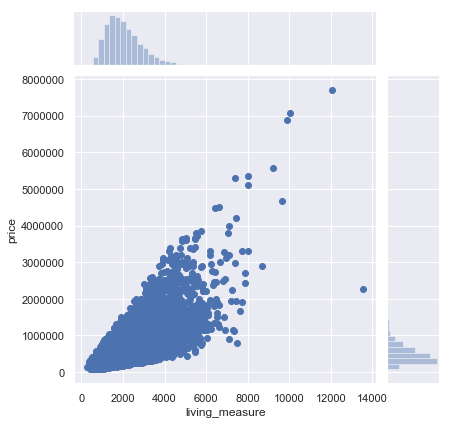

In [94]:
sns.jointplot(x=house_df['living_measure'], y=house_df['price'])

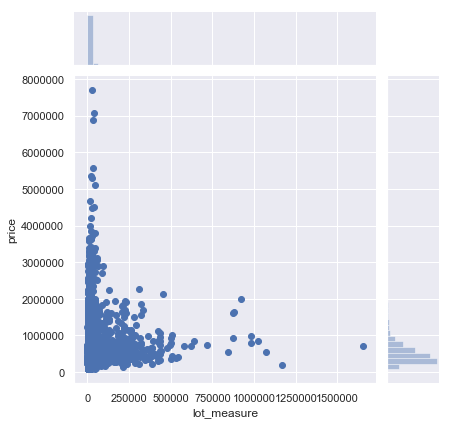

In [95]:
sns.jointplot(x=house_df['lot_measure'], y=house_df['price'])

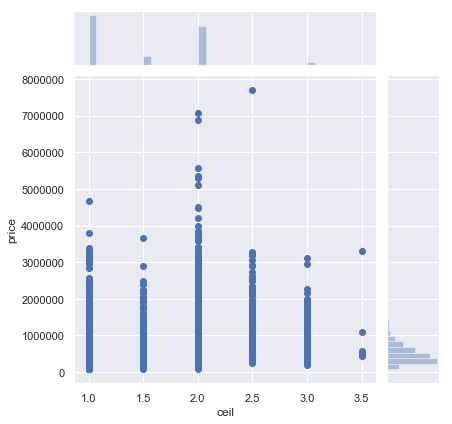

In [96]:
sns.jointplot(x=house_df['ceil'], y=house_df['price'])

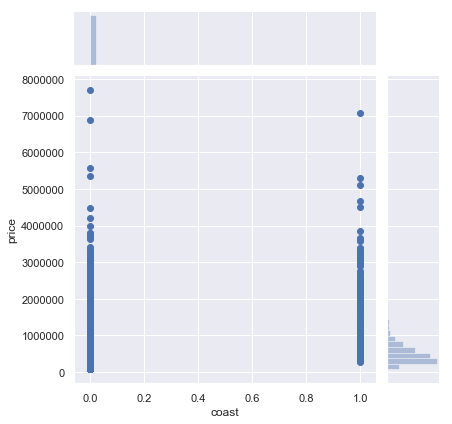

In [97]:
sns.jointplot(x=house_df['coast'], y=house_df['price'])

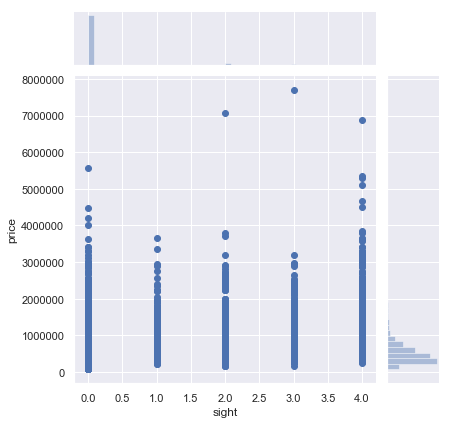

In [98]:
sns.jointplot(x=house_df['sight'], y=house_df['price'])

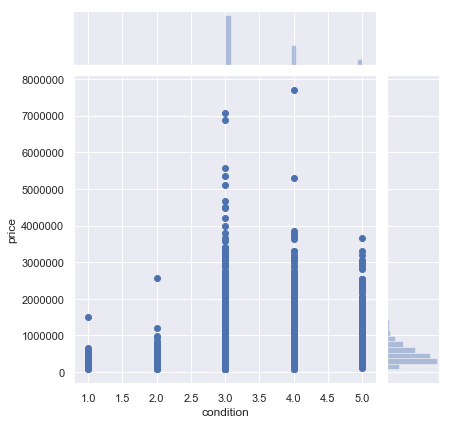

In [99]:
sns.jointplot(x=house_df['condition'], y=house_df['price'])

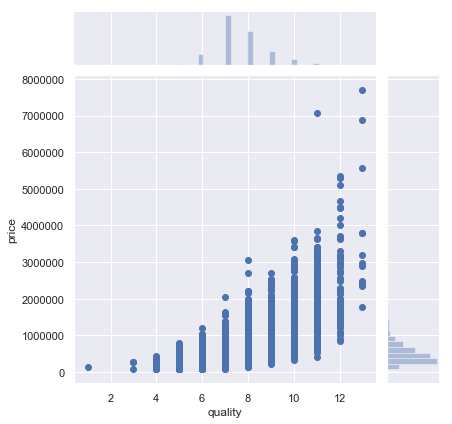

In [100]:
sns.jointplot(x=house_df['quality'], y=house_df['price'])

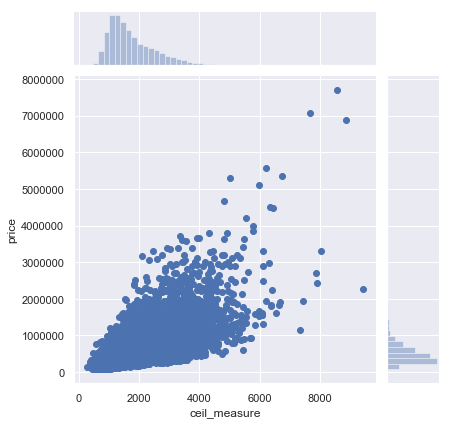

In [101]:
sns.jointplot(x=house_df['ceil_measure'], y=house_df['price'])

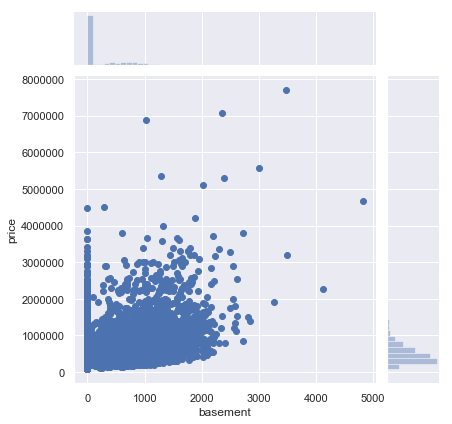

In [102]:
sns.jointplot(x=house_df['basement'], y=house_df['price'])

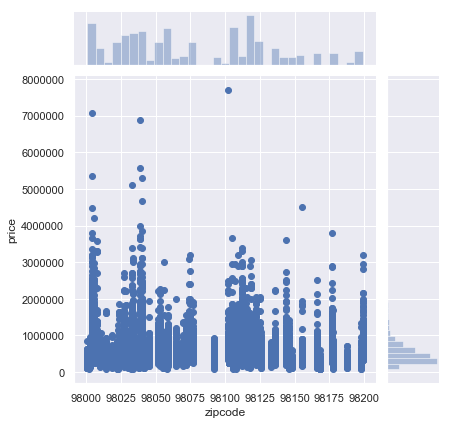

In [103]:
sns.jointplot(x=house_df['zipcode'], y=house_df['price'])

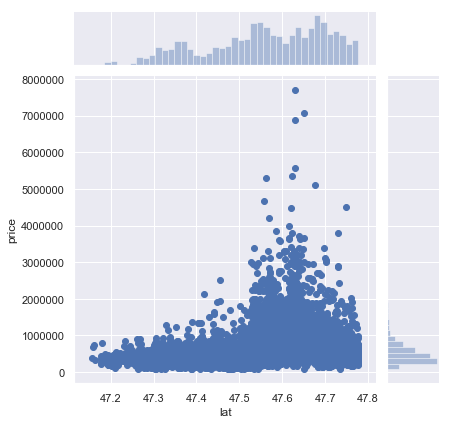

In [104]:
sns.jointplot(x=house_df['lat'], y=house_df['price'])

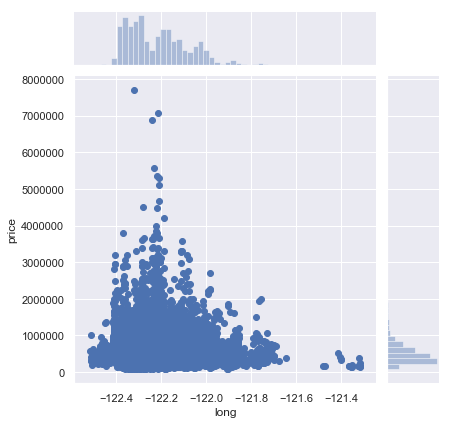

In [105]:
sns.jointplot(x=house_df['long'], y=house_df['price'])

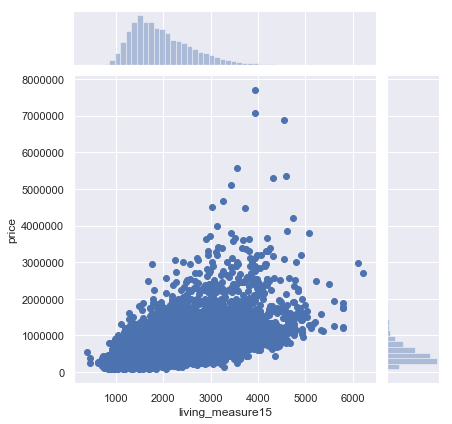

In [106]:
sns.jointplot(x=house_df['living_measure15'], y=house_df['price'])

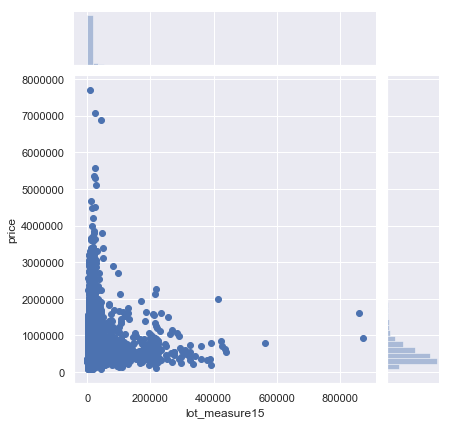

In [107]:
sns.jointplot(x=house_df['lot_measure15'], y=house_df['price'])

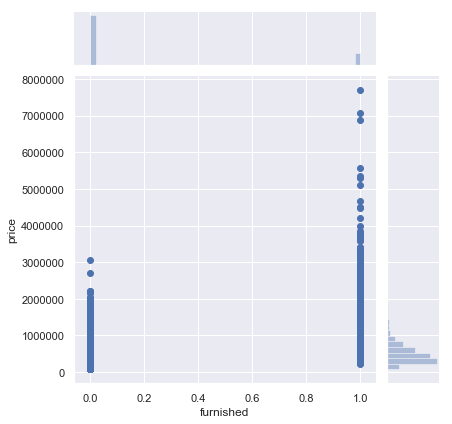

In [108]:
sns.jointplot(x=house_df['furnished'], y=house_df['price'])

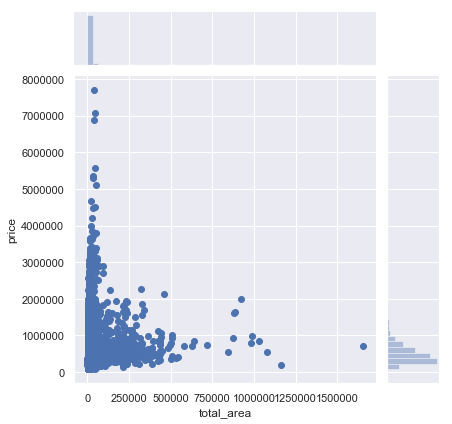

In [109]:
sns.jointplot(x=house_df['total_area'], y=house_df['price'])

### Plotting Multi variate distributions

In [109]:
##house_feature_df = house_feature_df.drop(['living_measure15','lot_measure15','ceil_measure' ,'total_area'], axis=1)#
 

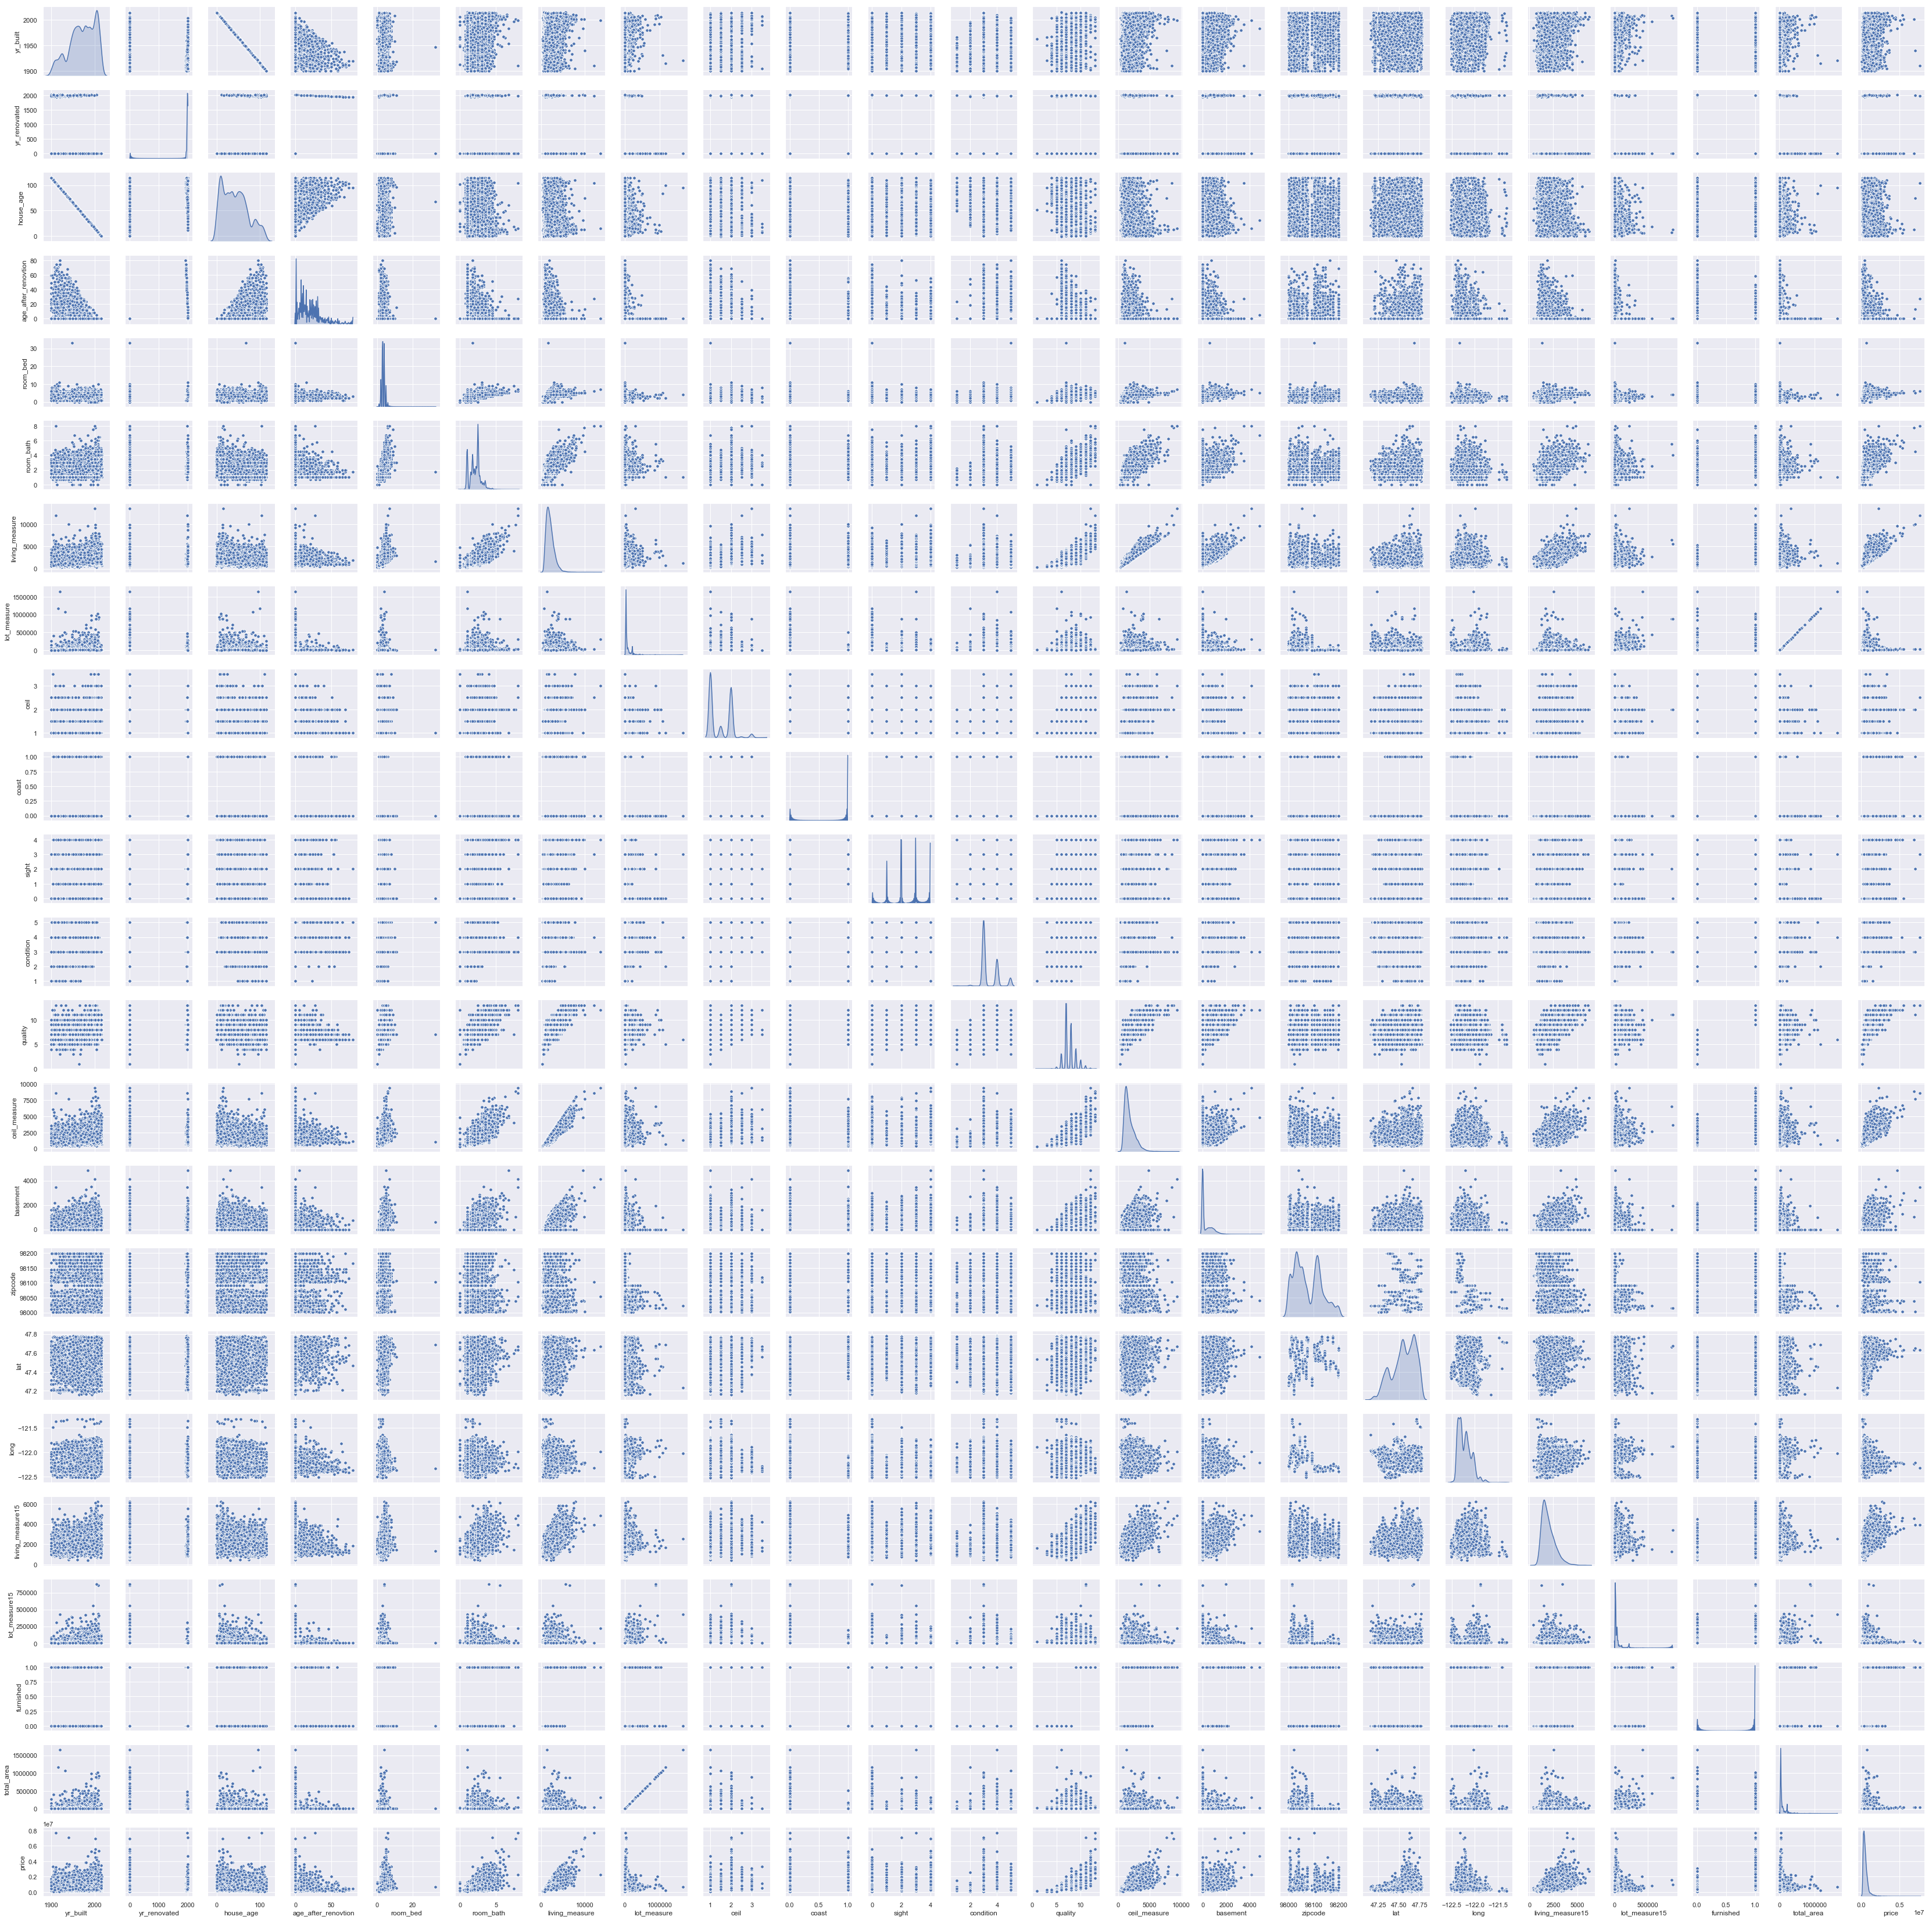

In [110]:
sns.pairplot(house_feature_df,markers="h",diag_kind= 'kde', size = 2.0)

In [111]:
#sns.pairplot(house_feature_df)

### Plot to get correlated variables

In [114]:
corr = house_feature_df.corr()
corr

yr_built  yr_renovated  house_age  age_after_renovtion  \
yr_built             1.000000     -0.225697  -0.999874            -0.197002   
yr_renovated        -0.225697      1.000000   0.225309             0.752069   
house_age           -0.999874      0.225309   1.000000             0.196794   
age_after_renovtion -0.197002      0.752069   0.196794             1.000000   
room_bed             0.153745      0.018435  -0.153890            -0.010110   
room_bath            0.505092      0.051101  -0.505467            -0.000704   
living_measure       0.316544      0.055084  -0.316974             0.019150   
lot_measure          0.052447      0.007636  -0.052355             0.014421   
ceil                 0.489062      0.005626  -0.489389            -0.002249   
coast               -0.026537      0.093025   0.026471             0.104728   
sight               -0.055153      0.103633   0.055174             0.090297   
condition           -0.364947     -0.061136   0.364212            -0.006348   
quality              0.445329      0.014357  -0.445767            -0.022653   
ceil_measure         0.422838      0.022666  -0.423182             0.008122   
basement            -0.134590      0.071909   0.134340             0.024546   
zipcode             -0.345819      0.064347   0.345802             0.046094   
lat                 -0.148606      0.029206   0.148125             0.018029   
long                 0.408531     -0.068736  -0.408494            -0.052013   
living_measure15     0.324568     -0.002677  -0.324886            -0.008548   
lot_measure15        0.070307      0.007870  -0.070299             0.011684   
furnished            0.304146      0.017308  -0.304524            -0.012124   
total_area           0.059212      0.008820  -0.059130             0.014785   
price                0.051796      0.126803  -0.051748             0.067799   

                     room_bed  room_bath  living_measure  lot_measure  \
yr_built             0.153745   0.505092        0.316544     0.052447   
yr_renovated         0.018435   0.051101        0.055084     0.007636   
house_age           -0.153890  -0.505467       -0.316974    -0.052355   
age_after_renovtion -0.010110  -0.000704        0.019150     0.014421   
room_bed             1.000000   0.516772        0.577512     0.031719   
room_bath            0.516772   1.000000        0.754422     0.087143   
living_measure       0.577512   0.754422        1.000000     0.171957   
lot_measure          0.031719   0.087143        0.171957     1.000000   
ceil                 0.175207   0.499863        0.352867    -0.005950   
coast               -0.006685   0.063734        0.103902     0.021571   
sight                0.079542   0.186684        0.283753     0.075012   
condition            0.027896  -0.127839       -0.060973    -0.009298   
quality              0.358396   0.664727        0.762402     0.112541   
ceil_measure         0.478441   0.684994        0.876683     0.182581   
basement             0.303035   0.283539        0.434419     0.015107   
zipcode             -0.153621  -0.202958       -0.198621    -0.129411   
lat                 -0.010228   0.023444        0.051118    -0.085992   
long                 0.129836   0.221935        0.239214     0.229555   
living_measure15     0.393161   0.568194        0.756205     0.143650   
lot_measure15        0.029117   0.086627        0.182775     0.718097   
furnished            0.260252   0.484767        0.632625     0.118133   
total_area           0.044318   0.103419        0.193303     0.999764   
price                0.309011   0.524992        0.701639     0.088672   

                         ceil     coast  ...  ceil_measure  basement  \
yr_built             0.489062 -0.026537  ...      0.422838 -0.134590   
yr_renovated         0.005626  0.093025  ...      0.022666  0.071909   
house_age           -0.489389  0.026471  ...     -0.423182  0.134340   
age_after_renovtion -0.002249  0.104728  ...      0.008122  0.024546   
room_bed   

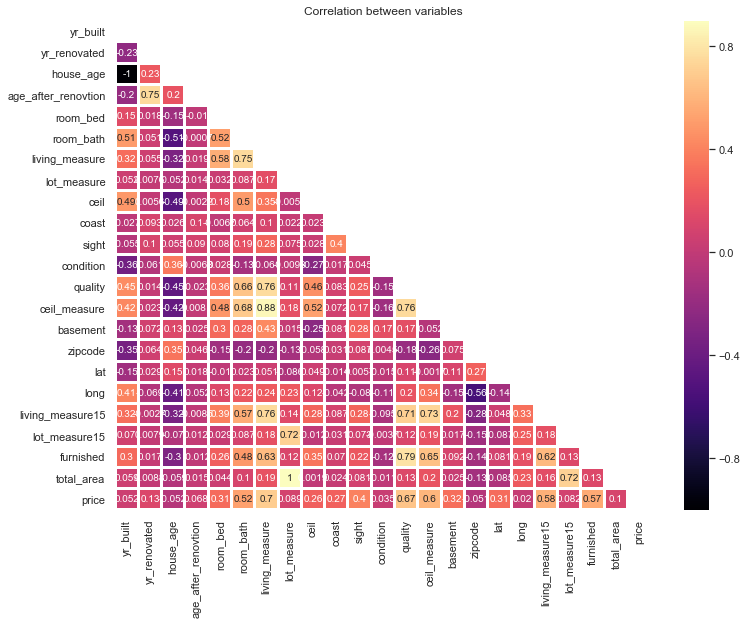

In [115]:
mask = np.zeros_like(corr)  
mask[np.triu_indices_from(mask)] = True

plt.figure(figsize=(12,9))

with sns.axes_style("white"):
    sns.heatmap(corr,annot=True,linewidth=2, vmax=.9,mask = mask,cmap="magma",annot_kws={"size":10})
plt.title("Correlation between variables")
plt.show()

### Observations

### To Summarize

## End of EDA Phase